Données brutes (NumPy)
[[16.   7.1  7.9]
 [14.8  7.3  8.3]
 [15.6  7.2  8. ]]

Moyennes des paramètres
[15.46666667  7.2         8.06666667]

Fichier 'moyennes_eau.txt' sauvegardé.

Données initiales (pandas)
  Site  Temperature   pH  Oxygene
0    A         15.2  7.4      8.1
1    B         16.0  7.1      7.9
2    C         14.8  NaN      8.3
3    D         15.6  7.2      NaN
4    E          NaN  7.3      8.0

Valeurs manquantes par colonne
Site           0
Temperature    1
pH             1
Oxygene        1
dtype: int64

Données après remplissage des NaN
  Site  Temperature    pH  Oxygene
0    A         15.2  7.40    8.100
1    B         16.0  7.10    7.900
2    C         14.8  7.25    8.300
3    D         15.6  7.20    8.075
4    E         15.4  7.30    8.000

Données finales avec colonnes dérivées
  Site  Temperature    pH  Oxygene  Qualite Alerte
0    A         15.2  7.40    8.100    Bonne     OK
1    B         16.0  7.10    7.900  Moyenne     OK
2    C         14.8  7.25    8.300  

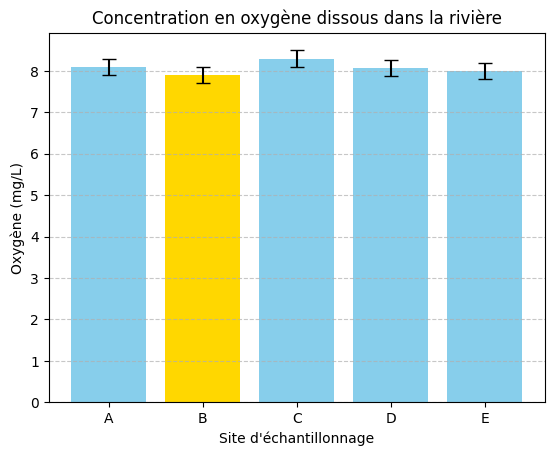

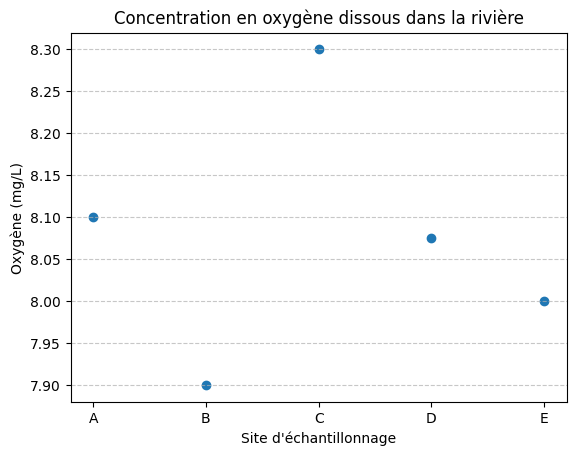

In [ ]:
import numpy as np
import pandas as pd

# PARTIE 1 — Lecture et écriture avec NumPy

# Lecture du fichier texte "eau.txt" (valeurs numériques sans en-têtes, délimitées par un espace)
donnees_np = np.genfromtxt("eau.txt", delimiter=" ", skip_header=1)

print("Données brutes (NumPy)")
print(donnees_np)

# Calcul de la moyenne pour chaque colonne
moyennes = np.nanmean(donnees_np, axis=0)

print()
print("Moyennes des paramètres")
print(moyennes)

# Sauvegarde des moyennes dans un fichier texte
np.savetxt("moyennes_eau.txt", moyennes, fmt="%.2f")
print()
print("Fichier 'moyennes_eau.txt' sauvegardé.")


# PARTIE 1 — Lecture et nettoyage avec pandas

# Lecture du fichier CSV "eau_riviere.csv"
df = pd.read_csv("eau_riviere.csv")

print()
print("Données initiales (pandas)")
print(df)

# Détection des valeurs manquantes
print()
print("Valeurs manquantes par colonne")
print(df.isna().sum())

# Remplacement des valeurs manquantes par la moyenne de la colonne
df["Temperature"] = df["Temperature"].fillna(df["Temperature"].mean())
df["pH"] = df["pH"].fillna(df["pH"].mean())
df["Oxygene"] = df["Oxygene"].fillna(df["Oxygene"].mean())

# OU pour tout le DataFrame d’un coup
# df = df.fillna(df.mean(numeric_only=True))

print()
print("Données après remplissage des NaN")
print(df)


# Ajout de la colonne 'Qualite' selon la concentration en oxygène
# Règles :
# - Oxygène >= 8.0 → "Bonne"
# - 7.5 <= Oxygène < 8.0 → "Moyenne"
# - Oxygène < 7.5 → "Faible"

df["Qualite"] = np.where(
    df["Oxygene"] >= 8.0, "Bonne",
    np.where(
        (df["Oxygene"] >= 7.5) & (df["Oxygene"] < 8.0), "Moyenne",
        "Faible"
    )
)


# Ajout de la colonne 'Alerte' selon le pH
# Si pH < 7.0 → "Attention", sinon "OK"

df["Alerte"] = np.where(df["pH"] < 7.0, "Attention", "OK")

print()
print("Données finales avec colonnes dérivées")
print(df)


# Sauvegarde finale du fichier nettoyé
df.to_csv("eau_riviere_nettoyee.csv", index=False)
print()
print("Fichier 'eau_riviere_nettoyee.csv' sauvegardé avec succès.")

# PARTIE 2 — Visualisation graphique (Optionnel)

import matplotlib.pyplot as plt

# Graphique 1
erreur = 0.2
couleurs = df["Qualite"].map({"Bonne": "skyblue", "Moyenne": "gold", "Faible": "salmon"})

plt.bar(df["Site"], df["Oxygene"], yerr=erreur, capsize=5, color=couleurs)
plt.title("Concentration en oxygène dissous dans la rivière")
plt.xlabel("Site d'échantillonnage")
plt.ylabel("Oxygène (mg/L)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Graphique 2
plt.scatter(df["Site"], df["Oxygene"])
plt.title("Concentration en oxygène dissous dans la rivière")
plt.xlabel("Site d'échantillonnage")
plt.ylabel("Oxygène (mg/L)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




In [2]:
import pandas as pd

df = pd.read_csv("donnees.csv", delimiter=";", decimal=",")
df

,x,v
0,0.00,0.00
1,0.02,NaN
2,0.04,0.60
3,0.06,0.82
4,0.08,0.96
5,0.10,1.05
6,0.12,1.18
7,0.14,1.26
8,0.16,NaN
9,0.18,1.42


In [4]:
phrase = "J'aime la bio"

print(phrase.find("J"))

0


In [6]:
import numpy as np
t = np.array([2, 4, 6, 8])
masque = (t > 4)
print(t[masque])


[6 8]


In [7]:
import numpy as np

t = np.array([2, 4, 6, 8])
print(np.sum(t))

20


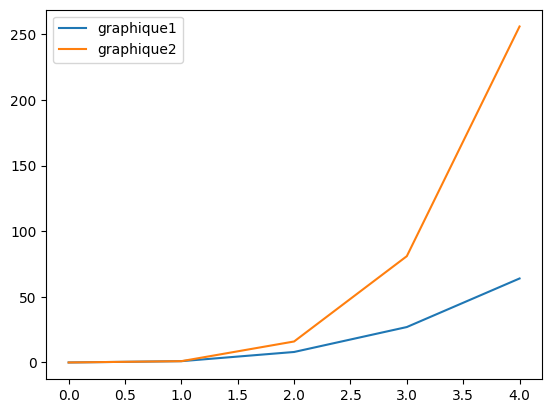

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3,4])
y = x**3
z = x**4

plt.plot(x, y, label="graphique1")
plt.plot(x, z, label="graphique2")
plt.legend()
plt.show()

In [ ]:
plt.plot(x,y, label = "graphique1")
plt.plot(x,z, label = "graphique2")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Données
mois = np.arange(1, 13)
temperatures = np.array([-5, -3, 2, 8, 14, 19, 23, 21, 16, 9, 3, -2])

# ------------------------------------------------------------------
# 1️⃣ Création du dictionnaire {mois: température}
# ------------------------------------------------------------------
climat = dict(zip(mois, temperatures))
print("Dictionnaire climat :")
print(climat)

# ------------------------------------------------------------------
# 2️⃣ Calculs statistiques (moyenne, min, max)
# ------------------------------------------------------------------
moyenne = np.mean(temperatures)
minimum = np.min(temperatures)
maximum = np.max(temperatures)

print(f"\nTempérature moyenne annuelle : {moyenne:.2f} °C")
print(f"Température minimale : {minimum} °C")
print(f"Température maximale : {maximum} °C")

# ------------------------------------------------------------------
# 3️⃣ Création d’un masque booléen
# ------------------------------------------------------------------
masque = temperatures > moyenne
mois_sup_moy = mois[masque]

print("\nMois où la température est supérieure à la moyenne :")
print(mois_sup_moy)

# ------------------------------------------------------------------
# 4️⃣ Tracé du graphique et droite de régression
# ------------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(mois, temperatures, 'o-', label='Température mensuelle')

# Régression linéaire avec np.polyfit()
a, b = np.polyfit(mois, temperatures, 1)  # a = pente, b = ordonnée à l’origine
droite = a * mois + b
plt.plot(mois, droite, 'r--', label=f"Régression linéaire (y = {a:.2f}x + {b:.2f})")

plt.title("Températures moyennes mensuelles")
plt.xlabel("Mois")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.show()
